<a href="https://colab.research.google.com/github/thobranifurqon/FA_BigData/blob/master/PySpark_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalasi Spark pada Google Colab

In [30]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.6.tgz
!tar xf spark-2.4.6-bin-hadoop2.6.tgz
!pip install -q findspark

In [31]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.6"

Import library Spark yang sudah diinstal

In [32]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.6")
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [33]:
!pip install -q pyspark_dist_explore

In [ ]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

Inisialisasi SparkContext dan SparkSession

In [34]:
sc = spark.sparkContext
spark = SparkSession(sc)

Load Dataset

In [36]:
avocado_df = spark.read.csv("/content/sample_data/avocado.csv", header=True, inferSchema=True)
avocado_df.printSchema() 

root
 |-- _c0: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- AveragePrice: double (nullable = true)
 |-- Total Volume: double (nullable = true)
 |-- 4046: double (nullable = true)
 |-- 4225: double (nullable = true)
 |-- 4770: double (nullable = true)
 |-- Total Bags: double (nullable = true)
 |-- Small Bags: double (nullable = true)
 |-- Large Bags: double (nullable = true)
 |-- XLarge Bags: double (nullable = true)
 |-- type: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- region: string (nullable = true)



Proses EDA

mengecek jumlah AveragePrice pada data_set kita

In [37]:
print("Jumlah AveragePrice:")
avocado_df.count()

Jumlah AveragePrice:


18249



Kita gunakan fungsi describe() untuk mengetahui statistik data. Pada contoh ini kita cek statistik dari data pada kolom year.


In [38]:
avocado_df.select('year').describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|             18249|
|   mean|2016.1478985149872|
| stddev|0.9399384671420276|
|    min|              2015|
|    max|              2018|
+-------+------------------+



Untuk melihat perseberan data pada kolom Year, kita plot Histogram data. Hasil plot adalah sebagai berikut

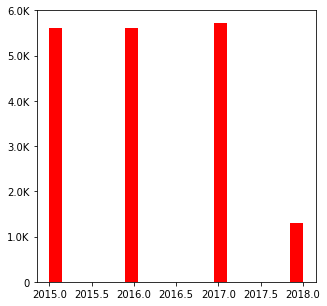

In [39]:
avocado_df_year = avocado_df.select('year')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, avocado_df_year, bins=20, color="red")
plt.show()

Dapat kita lihat dari sebaran data  di atas, tidak terdapat data outlier, karena nilai averageprice avocado setiap tahun > 2015.0 dan < 2018.0 sehingga data year adalah valid (tidak terdapat outlier)

In [ ]:
print("Jumlah total AveragePrice dengan kolom year kosong(null):")
avocado_df.where(col("year").isNull()).count()

Jumlah total AveragePrice dengan kolom year kosong(null):


0

dikarenakan data yang kita punya tidak ada yang null maka kita tidak melakukan pre-processing dan data kita siap untuk dilanjutkan untuk proses selanjutnya


In [ ]:
spark.stop()